In [161]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor


In [48]:
wqi = pd.read_csv('해양환경측정망 연안.csv')


# 데이터전처리

In [49]:
wqi.replace('-',np.nan, inplace=True)

In [50]:
wqi.isna().sum()

정점명                  0
관측년도                 0
관측월                  0
투명도(m)               4
수온(℃)표층              0
수온(℃)저층              0
염분표층                 0
염분저층                 0
수소이온농도표층             0
수소이온농도저층             0
용존산소량(㎎/L)표층         0
용존산소량(㎎/L)저층         0
화학적산소요구량(㎎/L)표층      0
화학적산소요구량(㎎/L)저층      0
암모니아성질소(㎍/L)표층       0
암모니아성질소(㎍/L)저층       1
아질산성질소(㎍/L)표층        0
아질산성질소(㎍/L)저층        0
질산성질소(㎍/L)표층         0
질산성질소(㎍/L)저층         1
용존무기질소(㎍/L)표층        0
용존무기질소(㎍/L)저층        0
총질소(㎍/L)표층           0
총질소(㎍/L)저층           0
용존무기인(㎍/L)표층         1
용존무기인(㎍/L)저층         0
총인(㎍/L)표층            0
총인(㎍/L)저층            0
규산규소(㎍/L)표층          0
규산규소(㎍/L)저층          0
부유물질(㎎/L)표층          1
부유물질(㎎/L)저층        289
클로로필A(㎍/L)표층         2
클로로필A(㎍/L)저층       293
WQI등급                0
dtype: int64

In [67]:
np.unique(wqi['WQI등급'])

array([1., 2., 3., 4., 5.])

In [51]:
## 결측치는 약 300개로 모두 제거

wqi.dropna(inplace=True)

In [53]:
for i in wqi.columns[1:]:
    wqi[i] = wqi[i].astype('float64')

In [54]:
wqi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9815
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   정점명              9514 non-null   object 
 1   관측년도             9514 non-null   float64
 2   관측월              9514 non-null   float64
 3   투명도(m)           9514 non-null   float64
 4   수온(℃)표층          9514 non-null   float64
 5   수온(℃)저층          9514 non-null   float64
 6   염분표층             9514 non-null   float64
 7   염분저층             9514 non-null   float64
 8   수소이온농도표층         9514 non-null   float64
 9   수소이온농도저층         9514 non-null   float64
 10  용존산소량(㎎/L)표층     9514 non-null   float64
 11  용존산소량(㎎/L)저층     9514 non-null   float64
 12  화학적산소요구량(㎎/L)표층  9514 non-null   float64
 13  화학적산소요구량(㎎/L)저층  9514 non-null   float64
 14  암모니아성질소(㎍/L)표층   9514 non-null   float64
 15  암모니아성질소(㎍/L)저층   9514 non-null   float64
 16  아질산성질소(㎍/L)표층    9514 non-null   float64
 17  아질산성질소(㎍/L)저층 

# EDA

<AxesSubplot:>

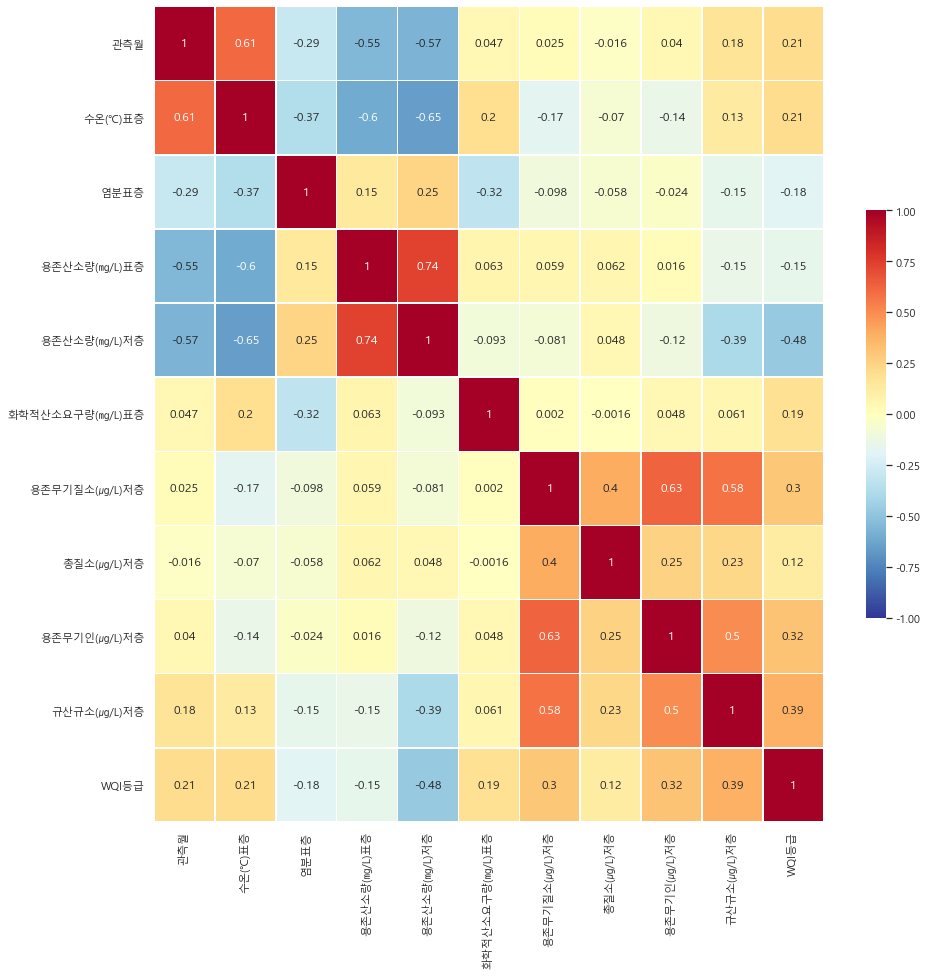

In [55]:
## 상관계수

df = wqi.loc[:,['관측월', '수온(℃)표층', '염분표층', '용존산소량(㎎/L)표층', '용존산소량(㎎/L)저층',
       '화학적산소요구량(㎎/L)표층', '용존무기질소(㎍/L)저층', '총질소(㎍/L)저층', '용존무기인(㎍/L)저층',
       '규산규소(㎍/L)저층', 'WQI등급']].corr()
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
plt.figure(figsize = ( 15,15))
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

In [111]:
## 각 등급별 개수
np.unique(wqi['WQI등급'], return_counts=True)

(array([1., 2., 3., 4., 5.]),
 array([5111, 2562, 1386,  397,   58], dtype=int64))

## 특정 지점 WQI 수질 파악

In [96]:
wqi['관측년도'] = wqi['관측년도'].astype('string')
wqi['관측월'] = wqi['관측월'].astype('string')

In [100]:
wqi['날짜'] = wqi['관측년도'] + '/' +  wqi['관측월']

In [103]:
wqi['날짜'] = pd.to_datetime(wqi['날짜']) 

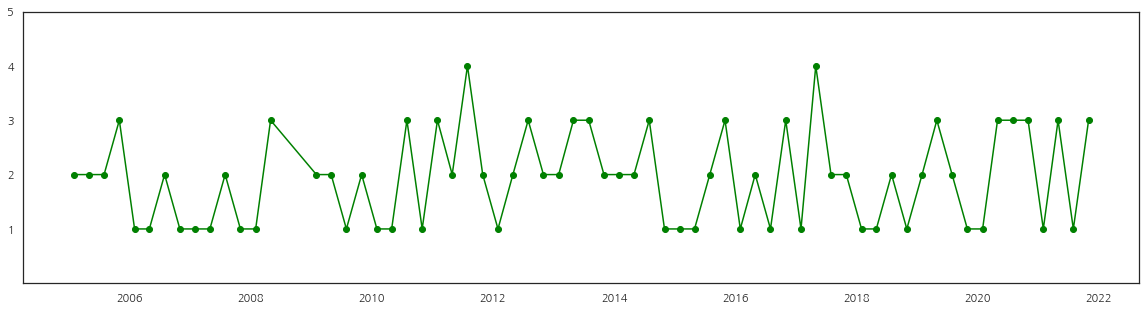

In [130]:
plt.figure(figsize=(20,5))
plt.ylim(0,5)
plt.yticks([1,2,3,4,5])
plt.plot(wqi[wqi['정점명']=='속초1']['날짜'], wqi[wqi['정점명']=='속초1']['WQI등급'], color = 'green',marker='o')

## 년도/월별 WQI 수질 파악

In [62]:
wqi.groupby('관측월').mean()

,관측년도,투명도(m),수온(℃)표층,수온(℃)저층,염분표층,염분저층,수소이온농도표층,수소이온농도저층,용존산소량(㎎/L)표층,용존산소량(㎎/L)저층,...,용존무기인(㎍/L)저층,총인(㎍/L)표층,총인(㎍/L)저층,규산규소(㎍/L)표층,규산규소(㎍/L)저층,부유물질(㎎/L)표층,부유물질(㎎/L)저층,클로로필A(㎍/L)표층,클로로필A(㎍/L)저층,WQI등급
관측월,,,,,,,,,,,,,,,,,,,,,
2.0,2013.027744,6.683762,9.539225,8.952982,33.753856,33.790747,8.161465,8.153962,9.596181,9.534145,...,15.134390,27.266144,30.212236,276.155096,283.733309,12.388266,14.892627,1.561355,1.717666,1.367605
5.0,2013.032284,5.630200,15.019273,12.625431,33.545840,33.725104,8.156314,8.096310,9.021520,8.646110,...,11.834912,22.379424,28.878827,164.717311,248.243277,11.985370,15.011120,2.027744,1.942362,1.653862
8.0,2013.337375,6.183543,24.294556,18.093010,31.689948,32.976254,8.141589,8.380381,7.949498,7.282399,...,11.780862,21.151815,29.429190,224.533278,340.853590,8.715825,10.815990,2.535972,1.845946,2.062365
11.0,2013.338101,6.347161,17.192120,15.865553,32.947139,33.175908,8.113143,8.076029,7.868791,7.488808,...,16.489051,25.641084,30.035436,295.535063,356.971634,8.988687,12.322926,1.644816,1.368405,1.781534


In [64]:
feb_wqi = wqi['WQI등급'][wqi['관측월'] == 2]
may_wqi = wqi['WQI등급'][wqi['관측월'] == 5]
aug_wqi = wqi['WQI등급'][wqi['관측월'] == 8]
nov_wqi = wqi['WQI등급'][wqi['관측월'] == 11]

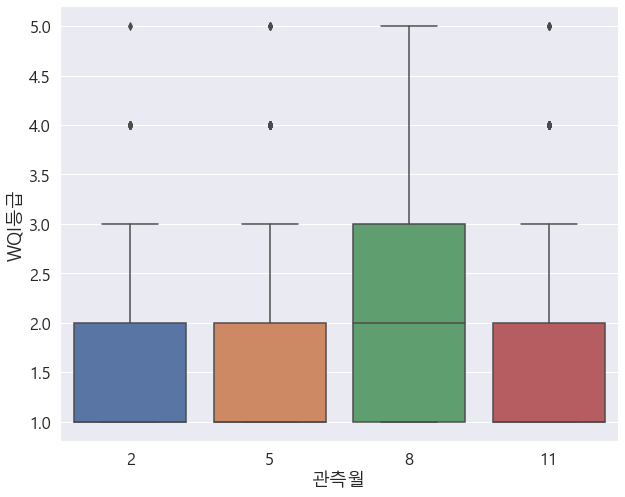

In [272]:
sns.boxplot(x = "관측월", y = "WQI등급", data = wqi, order=['2','5','8','11'])
sns.set(font="Malgun Gothic", 
        rc={'figure.figsize':(10,8),"axes.unicode_minus":False},
        style='darkgrid', font_scale=1)

<AxesSubplot:xlabel='관측월', ylabel='count'>

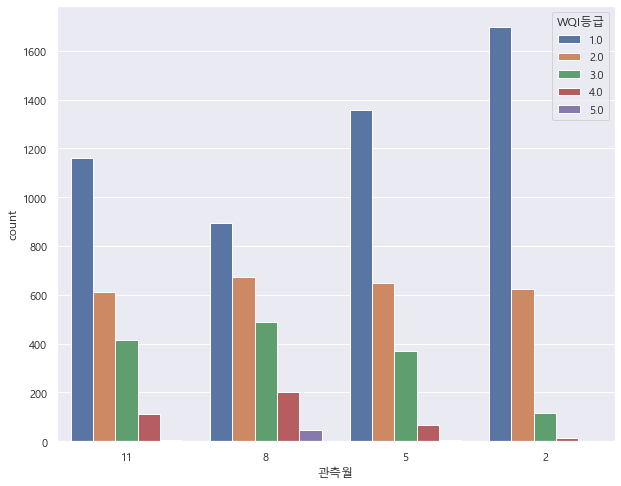

In [256]:
sns.set(font="Malgun Gothic", 
        rc={'figure.figsize':(10,8),"axes.unicode_minus":False},
        style='darkgrid')
sns.countplot(data=wqi, x="관측월", hue="WQI등급")


<ipython-input-70-6299efedf301>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(['Feb','May','Aug','Nov'], fontsize =17, Rotation = 0)


Text(0.5, 1.0, '월별 WQI 등급  \n')

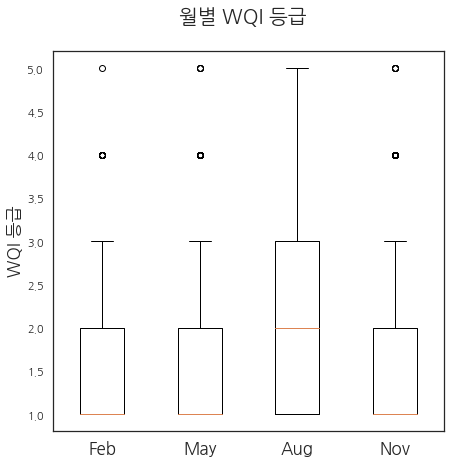

In [70]:
plt.rc('font', family='NanumGothic') # For Windows
fig , ax = plt.subplots(figsize=(7,7) )
ax.boxplot([feb_wqi,may_wqi,aug_wqi,nov_wqi])
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Feb','May','Aug','Nov'], fontsize =17, Rotation = 0)
ax.set_ylabel('WQI 등급', fontsize =17 )
#ax.set_ylim(-1,6)
#ax.set_yticklabels([0,1,2,3,4,5,6],fontsize = 17)
ax.set_title('월별 WQI 등급  \n',fontsize = 20)
    

## 이표본 검정 - t-test

In [116]:
bad = wqi[wqi['WQI등급'] >= 3].loc[:,[ '수온(℃)표층', '수온(℃)저층', '염분표층', '염분저층',
       '수소이온농도표층', '수소이온농도저층', '용존산소량(㎎/L)표층', 
       '화학적산소요구량(㎎/L)표층', '화학적산소요구량(㎎/L)저층', '암모니아성질소(㎍/L)표층',
       '암모니아성질소(㎍/L)저층', '아질산성질소(㎍/L)표층', '아질산성질소(㎍/L)저층', '질산성질소(㎍/L)표층',
       '질산성질소(㎍/L)저층',  '총질소(㎍/L)표층',
       '총질소(㎍/L)저층',  '총인(㎍/L)표층', '총인(㎍/L)저층',
       '규산규소(㎍/L)표층', '규산규소(㎍/L)저층', '부유물질(㎎/L)표층', '부유물질(㎎/L)저층']]
good = wqi[wqi['WQI등급'] <= 2].loc[:,[ '수온(℃)표층', '수온(℃)저층', '염분표층', '염분저층',
       '수소이온농도표층', '수소이온농도저층', '용존산소량(㎎/L)표층', 
       '화학적산소요구량(㎎/L)표층', '화학적산소요구량(㎎/L)저층', '암모니아성질소(㎍/L)표층',
       '암모니아성질소(㎍/L)저층', '아질산성질소(㎍/L)표층', '아질산성질소(㎍/L)저층', '질산성질소(㎍/L)표층',
       '질산성질소(㎍/L)저층',  '총질소(㎍/L)표층',
       '총질소(㎍/L)저층',  '총인(㎍/L)표층', '총인(㎍/L)저층',
       '규산규소(㎍/L)표층', '규산규소(㎍/L)저층', '부유물질(㎎/L)표층', '부유물질(㎎/L)저층']]

In [131]:
from scipy import stats

for i in bad.columns:
    print(i)
    t_stat, p_val = stats.ttest_ind(bad[i],good[i], equal_var=True, alternative='two-sided')
    print('t-stat', t_stat,' p_value : ',p_val)

수온(℃)표층
t-stat 18.957754098972877  p_value :  1.0648344393905747e-78
수온(℃)저층
t-stat -6.003564221884844  p_value :  2.0009347575833692e-09
염분표층
t-stat -13.077687453265337  p_value :  9.525343497206622e-39
염분저층
t-stat 6.662129562343043  p_value :  2.848397479225171e-11
수소이온농도표층
t-stat 2.0521666458537555  p_value :  0.040180779085153294
수소이온농도저층
t-stat 1.492118881287265  p_value :  0.1357011465605736
용존산소량(㎎/L)표층
t-stat -13.932230322508078  p_value :  1.0828804242845032e-43
화학적산소요구량(㎎/L)표층
t-stat 15.3681855545062  p_value :  1.145768773782453e-52
화학적산소요구량(㎎/L)저층
t-stat 1.2060197937441401  p_value :  0.22783985516555014
암모니아성질소(㎍/L)표층
t-stat 2.9351670285689417  p_value :  0.0033416562790042127
암모니아성질소(㎍/L)저층
t-stat 6.65646979088146  p_value :  2.959685823925623e-11
아질산성질소(㎍/L)표층
t-stat -4.328754262899682  p_value :  1.5148976601521162e-05
아질산성질소(㎍/L)저층
t-stat 4.323449713407242  p_value :  1.5517281111150146e-05
질산성질소(㎍/L)표층
t-stat -4.694264013842119  p_value :  2.7130822287190258e-06
질산성질소

In [ ]:
## 등분산성을 가정하고 T-tets를 하였을 때 의해
## 수온, 염분, 수소 표층, 용존산소량, COD 표층, 
## 암모니아성 질소, 아질산성질소, 질산성 질소, 총질소,
## 총인, 규산규소 
## 이 중요한 작용을 할 것으로 가설 설정

# Modeling

In [134]:
X = wqi[[ '관측년도','관측월','수온(℃)표층', '수온(℃)저층', '염분표층', '염분저층',
       '수소이온농도표층', '수소이온농도저층', '용존산소량(㎎/L)표층', 
       '화학적산소요구량(㎎/L)표층', '화학적산소요구량(㎎/L)저층', '암모니아성질소(㎍/L)표층',
       '암모니아성질소(㎍/L)저층', '아질산성질소(㎍/L)표층', '아질산성질소(㎍/L)저층', '질산성질소(㎍/L)표층',
       '질산성질소(㎍/L)저층',  '총질소(㎍/L)표층',
       '총질소(㎍/L)저층',  '총인(㎍/L)표층', '총인(㎍/L)저층',
       '규산규소(㎍/L)표층', '규산규소(㎍/L)저층', '부유물질(㎎/L)표층', '부유물질(㎎/L)저층']]
y = wqi['WQI등급']

In [135]:
y = y -1

In [149]:
len(X.columns)

25

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 24)


In [137]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


# RandomForest

In [152]:
model = RandomForestClassifier()
# parameter 넣어줄 값들 dict 형태로 정의해주기
h_para = {'max_depth':[2,4,6,8], "n_estimators": [100,200,300], 'min_samples_split':[2,3,4]}

grid_rf = GridSearchCV(model, param_grid=h_para,
                         cv=5, refit=True, return_train_score=True)
# GridSearchCV 인자설명
# cv = 하나의 파라미터 쌍으로 모델링할 때 train, test 교차검증을 3번실시하겠다는 뜻
# refit=True : GridSearch한 후 가장 최고로 좋은 파라미터로 학습시켜 놓겠다.
# ㄴ> 이것 때문에 애초에 GridSearchCV 적용한 객체만으로 최적의 파라미터 적용된 모델로드 가능

# GridSearch 하면서 모든 파라미터값들에 대해 학습 수행
grid_rf.fit(x_train, y_train)

# 각 파라미터값들에 대한 모델 결과값들이 cv_results_ 객체에 할당됨
scores_df = pd.DataFrame(grid_rf.cv_results_)

# score 결과값(ndarray형태로 할당됨) 중 특정 칼럼들만 가져오기 
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_split': 2, 'n_es...",0.554067,35,0.553513,0.551248,0.546649
1,"{'max_depth': 2, 'min_samples_split': 2, 'n_es...",0.556169,32,0.553513,0.555191,0.552562
2,"{'max_depth': 2, 'min_samples_split': 2, 'n_es...",0.555775,33,0.551543,0.557162,0.551248
3,"{'max_depth': 2, 'min_samples_split': 3, 'n_es...",0.556957,30,0.560735,0.557819,0.550591
4,"{'max_depth': 2, 'min_samples_split': 3, 'n_es...",0.558403,28,0.556796,0.555191,0.554534
5,"{'max_depth': 2, 'min_samples_split': 3, 'n_es...",0.554067,34,0.548917,0.550591,0.554534
6,"{'max_depth': 2, 'min_samples_split': 4, 'n_es...",0.553804,36,0.548917,0.547306,0.542707
7,"{'max_depth': 2, 'min_samples_split': 4, 'n_es...",0.556695,31,0.554826,0.555848,0.549934
8,"{'max_depth': 2, 'min_samples_split': 4, 'n_es...",0.558009,29,0.554826,0.556505,0.551905
9,"{'max_depth': 4, 'min_samples_split': 2, 'n_es...",0.584812,21,0.583716,0.589356,0.583443


In [ ]:
print(f"최적의 파라미터 : {grid_rf.best_params_}")
print(f"최적의 파라미터로 모델의 정확도 : {grid_rf.best_score_}")

In [277]:
rf = RandomForestClassifier(n_estimators=500, max_depth =15, min_samples_split=5)
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

0.6773515501839201
0.9540139272106162


In [219]:
import sklearn.metrics as metrics
rf_pred = rf.predict(x_test)
rf_train_pred = rf.predict(x_train)
print('f1 - ', metrics.f1_score(y_test,rf_pred, average='micro') )
print('f1 - ', metrics.f1_score(y_train,rf_train_pred, average='micro') )


f1 -  0.675249605885444
f1 -  0.9533569833136251


# XGB

In [ ]:
model = XGBRegressor()
# parameter 넣어줄 값들 dict 형태로 정의해주기
h_para = {'eta':[0.001,0.01,0.1],'max_depth':[3,6,9,12], "n_estimators": [100,200,300], 'subsample':[0.2,0.3]}

grid_xgb = GridSearchCV(model, param_grid=h_para,
                         cv=5, refit=True, return_train_score=True)
# GridSearchCV 인자설명
# cv = 하나의 파라미터 쌍으로 모델링할 때 train, test 교차검증을 3번실시하겠다는 뜻
# refit=True : GridSearch한 후 가장 최고로 좋은 파라미터로 학습시켜 놓겠다.
# ㄴ> 이것 때문에 애초에 GridSearchCV 적용한 객체만으로 최적의 파라미터 적용된 모델로드 가능

# GridSearch 하면서 모든 파라미터값들에 대해 학습 수행
grid_xgb.fit(x_train, y_train)

# 각 파라미터값들에 대한 모델 결과값들이 cv_results_ 객체에 할당됨
scores_df = pd.DataFrame(grid_xgb.cv_results_)

# score 결과값(ndarray형태로 할당됨) 중 특정 칼럼들만 가져오기 
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [279]:
xgb = XGBClassifier(eta=0.1, n_estimators=200)
xgb.fit(x_train,y_train)
print(xgb.score(x_test, y_test))
print(xgb.score(x_train,y_train))
#print(xgb.score(x_test_scaled, y_test))



C:\Users\lab\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6915396741986337
1.0


In [231]:
import sklearn.metrics as metrics
xgb_pred = xgb.predict(x_test)
xgb_train_pred = xgb.predict(x_train)
print('f1 - ', metrics.f1_score(y_test,xgb_pred, average='micro') )
print('f1 - ', metrics.f1_score(y_train,xgb_train_pred, average='micro') )


f1 -  0.6915396741986337
f1 -  1.0


# ANN

In [144]:
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [147]:
x_train

array([[-0.65686441, -1.30749666, -2.06296933, ...,  1.33530283,
         1.19567763,  1.22804353],
       [-0.65686441, -0.4144376 , -0.42940033, ..., -1.5126903 ,
         0.08662165,  0.12827606],
       [-1.27262928, -0.4144376 , -0.09965829, ...,  0.50179357,
        -0.31224936, -0.32270772],
       ...,
       [ 0.57466534, -1.30749666, -2.05119283, ...,  1.29505391,
         0.21309294,  0.19948402],
       [-1.47788424,  0.47862145,  1.19743924, ..., -0.96296139,
        -0.31224936, -0.42556367],
       [ 1.39568517, -0.4144376 , -0.49501227, ..., -0.47075277,
        -0.10794958, -0.27523575]])

In [283]:
model = Sequential()
model.add(Dense(units = 64, input_dim =25, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 5, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='acc')
model.fit(x_train, y_train, epochs = 100, validation_split=0.1)


Epoch 1/100
215/215 [==============================] - 2s 8ms/step - loss: 1.0450 - acc: 0.5626 - val_loss: 0.9416 - val_acc: 0.6089
Epoch 2/100
215/215 [==============================] - 1s 6ms/step - loss: 0.9345 - acc: 0.5998 - val_loss: 0.8941 - val_acc: 0.6102
Epoch 3/100
215/215 [==============================] - 1s 6ms/step - loss: 0.8953 - acc: 0.6124 - val_loss: 0.8757 - val_acc: 0.6050
Epoch 4/100
215/215 [==============================] - 1s 6ms/step - loss: 0.8697 - acc: 0.6175 - val_loss: 0.9563 - val_acc: 0.5420
Epoch 5/100
215/215 [==============================] - 1s 6ms/step - loss: 0.8530 - acc: 0.6214 - val_loss: 0.8451 - val_acc: 0.6325
Epoch 6/100
215/215 [==============================] - 1s 6ms/step - loss: 0.8207 - acc: 0.6370 - val_loss: 0.8218 - val_acc: 0.6391
Epoch 7/100
215/215 [==============================] - 1s 6ms/step - loss: 0.8229 - acc: 0.6391 - val_loss: 0.8512 - val_acc: 0.6365
Epoch 8/100
215/215 [==============================] - 1s 6ms/step - 

KeyboardInterrupt: 

In [284]:
prediction = model.predict(x_test)

In [287]:
import sklearn.metrics as metrics
ann_pred = model.predict(x_test)
ann_train_pred = model.predict(x_train)
print('f1 - ', metrics.f1_score(y_test,rf_pred, average='micro') )
print('f1 - ', metrics.f1_score(y_train,rf_train_pred, average='micro') )


f1 -  0.675249605885444
f1 -  0.9533569833136251


# Hard Voting

In [288]:
def mode(list):
    count = 0
    mode = 0;
    for x in list: 
        if list.count(x) > count:
            count = list.count(x)
            mode = x

    return mode

In [289]:
y_predict1 = rf.predict(x_test)
y_predict2 = xgb.predict(x_test)
y_predict = []

for i in range(0, len(y_predict1)):
    y_predict.append(mode([y_predict1[i], y_predict2[i], y_predict3[i]]))

print(accuracy_score(y_test, y_predict)) #1.0 #정확도
print('f1 - ', metrics.f1_score(y_test,y_predict, average='micro') )

0.7130846032580137
f1 -  0.7130846032580137


In [290]:
print("정확도 : {:.3f}".format(accuracy_score(y_test,y_predict)))


정확도 : 0.713
오차 행렬 
 [[945  76   6   0   0]
 [242 225  51   1   0]
 [ 34  70 165   5   1]
 [  5   7  39  22   1]
 [  0   1   3   4   0]]


In [366]:
cm =confusion_matrix(y_test,y_predict)

In [368]:
cm

array([[945,  76,   6,   0,   0],
       [242, 225,  51,   1,   0],
       [ 34,  70, 165,   5,   1],
       [  5,   7,  39,  22,   1],
       [  0,   1,   3,   4,   5]], dtype=int64)

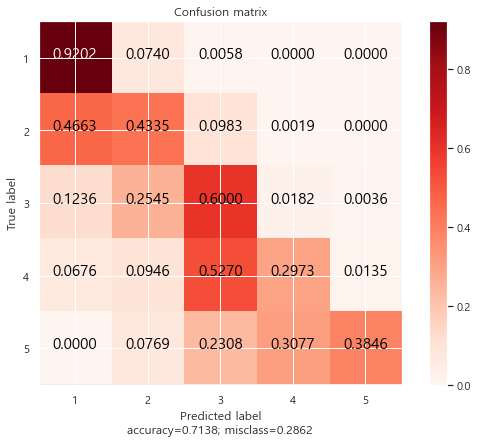

In [367]:
plot_confusion_matrix(cm,target_names=[1,2,3,4,5])

In [362]:
import itertools
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=[1,2,3,4,5], title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm,  cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.rc('font', size=15)  
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Feature Importance

In [291]:
def plot_feature_importance(importance,names,model_type):

    plt.rc('font',family='Malgun Gothic')
    sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

    feature_importance = np.array(importance)
    feature_names = np.array(names)


    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)


    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'][:15], y=fi_df['feature_names'][:15])

    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

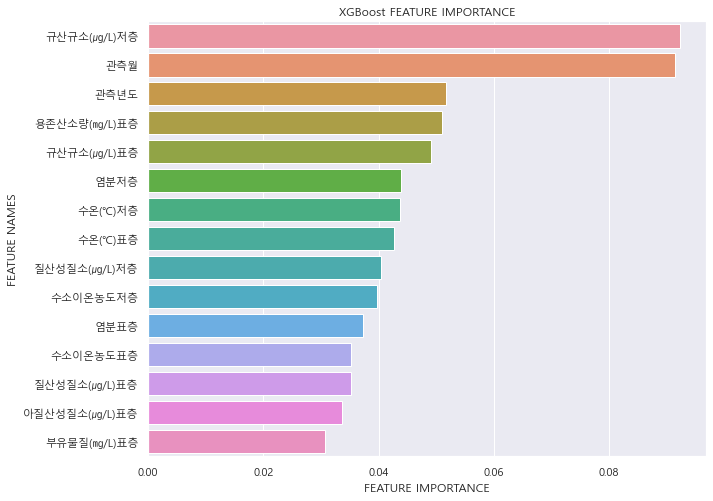

In [292]:
plot_feature_importance(xgb.feature_importances_,X.columns,'XGBoost ')

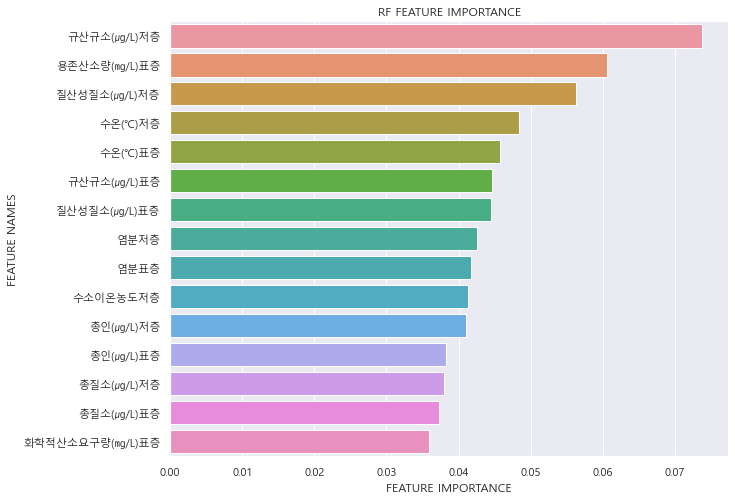

In [293]:
plot_feature_importance(rf.feature_importances_,X.columns,'RF ')

In [163]:
def base_model():
    model = Sequential()
    model.add(Dense(units = 64, input_dim =25, activation = 'relu'))
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units = 5, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='acc')

    return model

my_model = KerasRegressor(build_fn=base_model,  epochs=100, batch_size=5,verbose=1)    
my_model.fit(x_train,y_train)

Epoch 1/100


<ipython-input-163-7c79c367eb52>:21: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasRegressor(build_fn=base_model,  epochs=100, batch_size=5,verbose=1)


1523/1523 [==============================] - 10s 6ms/step - loss: 1.0233 - acc: 0.5740
Epoch 2/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.9241 - acc: 0.6025
Epoch 3/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.8900 - acc: 0.6183
Epoch 4/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.8683 - acc: 0.6313
Epoch 5/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.8527 - acc: 0.6401
Epoch 6/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.8485 - acc: 0.6447
Epoch 7/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.8222 - acc: 0.6513
Epoch 8/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.8202 - acc: 0.6518
Epoch 9/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.8052 - acc: 0.6584
Epoch 10/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.7958 - acc: 0.6538
Epoch 11/100
1523/1523 [======

1523/1523 [==============================] - 8s 5ms/step - loss: 0.5261 - acc: 0.7939
Epoch 84/100
1523/1523 [==============================] - 8s 5ms/step - loss: 0.5391 - acc: 0.7942
Epoch 85/100
1523/1523 [==============================] - 8s 5ms/step - loss: 0.5539 - acc: 0.7923
Epoch 86/100
1523/1523 [==============================] - 8s 5ms/step - loss: 0.5635 - acc: 0.7856
Epoch 87/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.5176 - acc: 0.7975
Epoch 88/100
1523/1523 [==============================] - 8s 5ms/step - loss: 0.5296 - acc: 0.7960
Epoch 89/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.5191 - acc: 0.8025
Epoch 90/100
1523/1523 [==============================] - 8s 5ms/step - loss: 0.5464 - acc: 0.7896
Epoch 91/100
1523/1523 [==============================] - 8s 5ms/step - loss: 0.5258 - acc: 0.7940
Epoch 92/100
1523/1523 [==============================] - 9s 6ms/step - loss: 0.5223 - acc: 0.8074
Epoch 93/100
1523/1523 

In [170]:
import eli5
from eli5.sklearn import PermutationImportance

In [172]:
## ANN PErmuatation Importance

perm = PermutationImportance(my_model, random_state=1).fit(x_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

1523/1523 [==============================] - 4s 3ms/step - loss: 0.7779 - acc: 0.7973


1523/1523 [==============================] - 5s 3ms/step - loss: 0.5907 - acc: 0.8212


Weight,Feature
1.0049 ± 0.0827,수온(℃)표층
0.8634 ± 0.0753,용존산소량(㎎/L)표층
0.8291 ± 0.0850,관측월
0.6986 ± 0.0555,수온(℃)저층
0.6639 ± 0.0599,관측년도
0.6410 ± 0.1026,질산성질소(㎍/L)표층
0.6288 ± 0.0736,염분저층
0.5867 ± 0.0474,규산규소(㎍/L)저층
0.4130 ± 0.1351,총질소(㎍/L)저층
0.4076 ± 0.0779,질산성질소(㎍/L)저층


In [184]:
## XGB permutation Importance 

perm = PermutationImportance(xgb, random_state=1).fit(x_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0682 ± 0.0026,용존산소량(㎎/L)표층
0.0294 ± 0.0030,규산규소(㎍/L)저층
0.0283 ± 0.0034,수온(℃)저층
0.0095 ± 0.0007,염분표층
0.0091 ± 0.0014,수소이온농도저층
0.0089 ± 0.0021,염분저층
0.0077 ± 0.0011,질산성질소(㎍/L)표층
0.0050 ± 0.0007,화학적산소요구량(㎎/L)표층
0.0050 ± 0.0015,관측년도
0.0048 ± 0.0012,수온(℃)표층


In [185]:
## RF Permutation Importance

perm = PermutationImportance(rf, random_state=1).fit(x_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0500 ± 0.0014,규산규소(㎍/L)저층
0.0318 ± 0.0018,용존산소량(㎎/L)표층
0.0115 ± 0.0023,관측년도
0.0096 ± 0.0013,질산성질소(㎍/L)저층
0.0064 ± 0.0008,관측월
0.0061 ± 0.0011,수온(℃)저층
0.0053 ± 0.0005,염분표층
0.0039 ± 0.0009,수소이온농도저층
0.0033 ± 0.0012,수온(℃)표층
0.0027 ± 0.0006,총인(㎍/L)저층
